In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!pip install -q pyomo

     |████████████████████████████████| 9.7 MB 5.2 MB/s 
     |████████████████████████████████| 49 kB 5.9 MB/s 


In [4]:
from pyomo.environ import *

## Ques1:[R] Fix p = 1. Write a linear optimization problem using the objective provided in the description. You may assume that a0 ≥ 0 and a1, a2 do not have bounds on them.
## Answer:
Let's assume a linear model of the form $R = a_0 + a_1T + a_2D $  \\
Where T = the daily average view-time per view: Total view time / total number of view \\
and D= the daily average number of
unskipped ads per view: Total unskipped ads/ total number of views \\

Since to obtain value of $a_0,a_1,a_2 $ we use least square method.By minimizing the difference  of forcasted revenue and actual revenue.
So let$ Q_i=R_i-\overline{R_i}$ ∀ i=1,2,3,⋯,6 \\
where $\overline{R_i}=a_0+a_1T_i+a_2D_i $

So we are minimize $\sum_{i=1}^6|Q_i|^p  $ for any P$ \geq 1$ \\
  ie. minimize $\sum_{i=1}^6|R_i-\overline{R_i}|^p $ \\
  ie. minimize $\sum_{i=1}^6|R_i-a_0-a_1T_i-a_2D_i|^p $ \\

Where$ T_i $ : the daily average view-time per view: Total view time / total number of view for ith video \\
And $D_i$ : the daily average number of
unskipped ads per view for ith video



## for p=1:
for p=1 we have tha following non linear problem to minimize:

$\sum_{i=1}^6|R_i-a_0-a_1T_i-a_2D_i|$ \\

we are to convert this non linear problem to linear optimization problem.To get linear problem let's assume $R_i-a_0-a_1T_i-a_2D_i=y_i$ ∀ i=1,2,3⋯6 ---------(1) 

Since we know that each $y_i$ is a real number and we know that each real number can be written as difference of two non negative real numbers such that:
$y_i=y_{i1}-y_{i2} $ where $y_{i1},y_{i2}\geq0 $ --------------(2) \
 defined as follows: \\
$y_{i1}=y_i \ if \ y_i >0 \ and \ y_{i1}=0 \ if \ y_i \leq0     $ and 

$y_{i2}=0 \ if \ y_i >0 \ and \ y_{i2}=-y_{i} \ if \ y_i \leq0     $

So $ \ \ \ \ \ \ |y_i|=|y_{i1}-y_{i2}| \\ ⇒ \ |y_i|= y_{i1}+y_{i2} $---------(3)

SO after using equation (1),(2)and (3) our objective function is:

min  $\sum_{i=1}^6|R_i-a_0-a_1T_i-a_2D_i|$ \\
⇒min $\sum_{i=1}^6|y_i|$ \\
⇒min  $\sum_{i=1}^6|y_{i1}-y_{i2}|$ \\
⇒ min $\sum_{i=1}^6y_{i1}+y_{i2}$ \\

So our linear objective function is:

 min $\sum_{i=1}^6y_{i1}+y_{i2}$ 

 By equation (1) and (3) we get:

$ y_{i1}-y_{i2} = R_i-a_0-a_1T_i-a_2D_i $ ∀ i=1,2,⋯,6

$y_{ij}\geq 0 ∀i ∈ \{1,2,3,4,5,6\} \ \text{and} \ j∈\{1,2\} $

Given that $a_0 \geq0$ and $a_1,a_2 ∈ \mathbf{R}$


In [6]:
df= pd.read_csv('22n0451_IE507_lab8_Ex2.csv')

In [7]:
df

,i,Ri,Vi,Bi,Ai
0,1,175,945,2800,23
1,2,450,832,3900,40
2,3,1050,2007,24900,78
3,4,900,800,36450,64
4,5,19,780,366,4
5,6,3550,5005,38500,150


In [8]:
df['Averageview']=df['Bi']/df['Vi']

In [9]:
df['Averageskipads']=df['Ai']/df['Vi']

In [10]:
df

,i,Ri,Vi,Bi,Ai,Averageview,Averageskipads
0,1,175,945,2800,23,2.962963,0.024339
1,2,450,832,3900,40,4.687500,0.048077
2,3,1050,2007,24900,78,12.406577,0.038864
3,4,900,800,36450,64,45.562500,0.080000
4,5,19,780,366,4,0.469231,0.005128
5,6,3550,5005,38500,150,7.692308,0.029970


In [11]:
model= ConcreteModel()

In [12]:
model.x=Var(range(6),range(2),domain=NonNegativeReals)
model.a=Var(range(3))

In [13]:
model.a[0].domain=NonNegativeReals

In [14]:
model.constraints= ConstraintList()

In [15]:
model.objective= Objective(expr=sum(model.x[i,j] for i in range(6) for j in range(2)))

In [16]:
for i in range(6):
  model.constraints.add(expr=model.x[i,0]-model.x[i,1] == df['Ri'][i] - model.a[0]-df['Averageview'][i]*model.a[1]-df['Averageskipads'][i]*model.a[2])

In [17]:
model.pprint()

5 Set Declarations
    a_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {0, 1, 2}
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    6 : {1, 2, 3, 4, 5, 6}
    x_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain              : Size : Members
        None :     2 : x_index_0*x_index_1 :   12 : {(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1), (4, 0), (4, 1), (5, 0), (5, 1)}
    x_index_0 : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    6 : {0, 1, 2, 3, 4, 5}
    x_index_1 : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {0, 1}

2 Var Declarations
    a : Size=3, Index=a_index
        Key : Lower : Value : Upper : Fixed : Stale : 

In [18]:
!apt-get install -y -qq coinor-cbc

Selecting previously unselected package coinor-libcoinutils3v5.
(Reading database ... 123934 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.10.14+repack1-1_amd64.deb ...
Unpacking coinor-libcoinutils3v5 (2.10.14+repack1-1) ...
Selecting previously unselected package coinor-libosi1v5.
Preparing to unpack .../1-coinor-libosi1v5_0.107.9+repack1-1_amd64.deb ...
Unpacking coinor-libosi1v5 (0.107.9+repack1-1) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.16.11+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.16.11+repack1-1) ...
Selecting previously unselected package coinor-libcgl1.
Preparing to unpack .../3-coinor-libcgl1_0.59.10+repack1-1_amd64.deb ...
Unpacking coinor-libcgl1 (0.59.10+repack1-1) ...
Selecting previously unselected package coinor-libcbc3.
Preparing to unpack .../4-coinor-libcbc3_2.9.9+repack1-1_amd64.deb ...
Unpacking coinor-libcbc3 (2.9.9+repack1-1) ...
Selecting p

In [19]:
opt_cbc = SolverFactory('cbc')

In [20]:
result = opt_cbc.solve(model)
print('Solver status:', result.solver.status)
print('Solver termination condition:',result.solver.termination_condition)
print('Solver time taken',result.solver.time)

Solver status: ok
Solver termination condition: optimal
Solver time taken 0.05090761184692383


In [21]:
print('\nObjective = ', model.objective())

print(f'a0={model.a[0].value}')
print(f'a1={model.a[1].value}')
print(f'a2={model.a[2].value}')
for i in range(6):
  for j in range(2):
    print(f'x{i,j}={model.x[i,j].value}')





Objective =  3986.158757
a0=0.0
a1=4.0039722
a2=8969.6127
x(0, 0)=0.0
x(0, 1)=55.171656
x(1, 0)=0.0
x(1, 1)=0.0
x(2, 0)=651.7296
x(2, 1)=0.0
x(3, 0)=0.0
x(3, 1)=0.0
x(4, 0)=0.0
x(4, 1)=28.876801
x(5, 0)=3250.3807
x(5, 1)=0.0


In [22]:
# for p=1 , estimated umoney:
a0=0.0
a1=4.0039722
a2=8969.6127
df['Ri for p=1']=a0+a1*df['Averageview']+a2*df['Averageskipads']

In [23]:
df

,i,Ri,Vi,Bi,Ai,Averageview,Averageskipads,Ri for p=1
0,1,175,945,2800,23,2.962963,0.024339,230.171655
1,2,450,832,3900,40,4.687500,0.048077,449.999999
2,3,1050,2007,24900,78,12.406577,0.038864,398.270403
3,4,900,800,36450,64,45.562500,0.080000,899.999999
4,5,19,780,366,4,0.469231,0.005128,47.876801
5,6,3550,5005,38500,150,7.692308,0.029970,299.619348


### 4. [R] Solve the linear program using cbc solver, report the solver status, solver termination condition, optimal solution values for the decision variables, and the optimal objective function value. Comment on your observations.
### Answer:
Solver status: ok \\
Solver termination condition: optimal \\
Solver time taken 0.023586034774780273 \\
optimal objective function value: 3986.158757 \\
optimal values for the decision variables: \\
a0=0.0 \\
a1=4.0039722 \\
a2=8969.6127 \\

we can see that value of estimated revenue is approximately equal to real revenue for i = 2,4.But for i=1,5 difference between estimated revenue and real revenue is small but for i= 3,6 difference between estimated revenue and real revenue is so large.

### 5. [R] Now, consider p > 1. Write a general nonlinear optimization problem for p > 1. You may assume that a0 ≥ 0 and a1, a2 do not have bounds on them.
### Solution:
Optimization problem:

 Min $\sum_{i=1}^6|R_i-a_0-a_1T_i-a_2D_i|^p$ \\

 Since we know that$ \sqrt(x^2) = |x|$

 So we can write the above optimization problem in the below form: \\
 Min $\sum_{i=1}^6(\sqrt((R_i-a_0-a_1T_i-a_2D_i)^2))^p$ \\


 ⇒ Min $\sum_{i=1}^6(((R_i-a_0-a_1T_i-a_2D_i)^2)^{0.5})^p$ \\
 $a_0 \geq 0 ,a_1,a_2 ∈ \mathbf{R} $




### 7.[R] Solve the respective non-linear optimization problems for p = 1.5, 2 using ipopt solver, and for each p value report the solver status, solver termination conditions, time taken by solver, optimal solution values for the decision variables, and the optimal objective function value. Comment on your observations.
#### Answer:Solution for p=1.5,2


In [24]:
!wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64

In [25]:
solver = SolverFactory('ipopt', executable='/content/ipopt')

In [26]:
df.head(2)

,i,Ri,Vi,Bi,Ai,Averageview,Averageskipads,Ri for p=1
0,1,175,945,2800,23,2.962963,0.024339,230.171655
1,2,450,832,3900,40,4.687500,0.048077,449.999999


In [27]:
def func(p):
  model= ConcreteModel()
  model.a=Var(range(3),initialize=4)
  model.a[0].domain=NonNegativeReals
  model.constraints= ConstraintList()
  model.objective= Objective(expr=sum((((df['Ri'][i]-model.a[0]-model.a[1]*df['Averageview'][i]-model.a[2]*df['Averageskipads'][i])**2)**0.5)**p for i in range(6)))
  model.pprint()
  results = solver.solve(model)
  print(results)
  print('\nObjective = ', model.objective())
  print(f'a0={model.a[0].value}')
  print(f'a1={model.a[1].value}')
  print(f'a2={model.a[2].value}')

  
  


In [28]:
func(1.5)

2 Set Declarations
    a_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {0, 1, 2}
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    0 :      {}

1 Var Declarations
    a : Size=3, Index=a_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :     4 :  None : False : False : NonNegativeReals
          1 :  None :     4 :  None : False : False :            Reals
          2 :  None :     4 :  None : False : False :            Reals

1 Objective Declarations
    objective : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : (((175 - a[0] - 2.962962962962963*a[1] - 0.02433862433862434*a[2])**2)**0.5)**1.5 + (((450 - a[0] - 4.6875*a[1] - 0.04807692307692308*a[2])**2)**0.5)**1.5 + (((1050 - a[0] - 12.406576980568012*a[1] 

In [29]:
func(2)

2 Set Declarations
    a_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {0, 1, 2}
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    0 :      {}

1 Var Declarations
    a : Size=3, Index=a_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :     4 :  None : False : False : NonNegativeReals
          1 :  None :     4 :  None : False : False :            Reals
          2 :  None :     4 :  None : False : False :            Reals

1 Objective Declarations
    objective : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : (((175 - a[0] - 2.962962962962963*a[1] - 0.02433862433862434*a[2])**2)**0.5)**2 + (((450 - a[0] - 4.6875*a[1] - 0.04807692307692308*a[2])**2)**0.5)**2 + (((1050 - a[0] - 12.406576980568012*a[1] - 0.

### For p=1.5

Solver Status : ok \\
Termination condition: optimal \\
Time taken to solve problem: 0.034113407135009766 \\

Optimal objective function: 188066.9241172161 \\
Optimal solution values for the decision variables: \\
a0=503.7405941385695 \\
a1=2.7235995102785324 \\
a2=4802.719658515411 \\

### For p=2

Solver Status : ok \\
Termination condition: optimal \\
Time taken to solve problem: 0.02591991424560547 \\
 
Optimal objective function: 8399946.937111441 \\
Optimal solution values for the decision variables: \\
a0=884.3228471751012 \\
a1=1.8562371587132973 \\
a2=3097.0698797873274 \\
 





In [30]:
# for p=1.5 , estimated umoney:
a0=503.7405941385695
a1=2.7235995102785324
a2=4802.719658515411
df['Ri for p=1.5']=a0+a1*df['Averageview']+a2*df['Averageskipads']


In [31]:
df

,i,Ri,Vi,Bi,Ai,Averageview,Averageskipads,Ri for p=1,Ri for p=1.5
0,1,175,945,2800,23,2.962963,0.024339,230.171655,628.702108
1,2,450,832,3900,40,4.687500,0.048077,449.999999,747.407450
2,3,1050,2007,24900,78,12.406577,0.038864,398.270403,724.183923
3,4,900,800,36450,64,45.562500,0.080000,899.999999,1012.052170
4,5,19,780,366,4,0.469231,0.005128,47.876801,529.647922
5,6,3550,5005,38500,150,7.692308,0.029970,299.619348,668.629012


### Observation for p=1.5 
#### By above table we can see that value of difference between estimated revenue and  actual revenue for i=1,3,4,5 is not so large but values of estimated revenue has a big difference with actual revenue for i = 2,6.

In [32]:
df

,i,Ri,Vi,Bi,Ai,Averageview,Averageskipads,Ri for p=1,Ri for p=1.5
0,1,175,945,2800,23,2.962963,0.024339,230.171655,628.702108
1,2,450,832,3900,40,4.687500,0.048077,449.999999,747.407450
2,3,1050,2007,24900,78,12.406577,0.038864,398.270403,724.183923
3,4,900,800,36450,64,45.562500,0.080000,899.999999,1012.052170
4,5,19,780,366,4,0.469231,0.005128,47.876801,529.647922
5,6,3550,5005,38500,150,7.692308,0.029970,299.619348,668.629012


### Observation For p=1:
#### Similarly we can see that value of estimated revenue is approximately equal to actual revenue for i = 2,4.But for i=1,5 difference between estimated revenue and actual revenue is small but for i= 3,6 difference between estimated revenue and actual revenue is so large.

In [33]:
# for p=2 , estimated umoney:
a0=884.3228471751012
a1=1.8562371587132973
a2=3097.0698797873274
df['Ri for p=2']=a0+a1*df['Averageview']+a2*df['Averageskipads']



In [34]:
df

,i,Ri,Vi,Bi,Ai,Averageview,Averageskipads,Ri for p=1,Ri for p=1.5,Ri for p=2
0,1,175,945,2800,23,2.962963,0.024339,230.171655,628.702108,965.201229
1,2,450,832,3900,40,4.687500,0.048077,449.999999,747.407450,1041.921549
2,3,1050,2007,24900,78,12.406577,0.038864,398.270403,724.183923,1027.716846
3,4,900,800,36450,64,45.562500,0.080000,899.999999,1012.052170,1216.663243
4,5,19,780,366,4,0.469231,0.005128,47.876801,529.647922,901.076260
5,6,3550,5005,38500,150,7.692308,0.029970,299.619348,668.629012,991.420872


### Observations for p=2
#### Here we can see that difference between estimated revenue and actual revenue is small for i =3 only. but for other i ,difference is much larger than this.

### 8. [R] For each value of p ∈ {1, 1.5, 2}, prepare different plots depicting the actual revenue Ri and the forecast value eRi obtained using your optimization models for the data provided. Based on the plots, comment with suitable justifications if the forecast model that you have assumed would be good fit for the given data.
#### Answer:


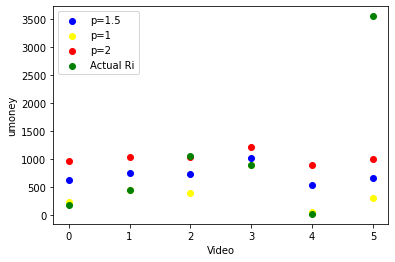

In [35]:

plt.scatter(range(6),df['Ri for p=1.5'],label='p=1.5',color='Blue')
plt.scatter(range(6),df['Ri for p=1'],label='p=1',color='Yellow')
plt.scatter(range(6),df['Ri for p=2'],label='p=2',color='Red')
plt.scatter(range(6),df['Ri'],label='Actual Ri',color='Green')
plt.xlabel('Video')
plt.ylabel('umoney')
plt.legend();

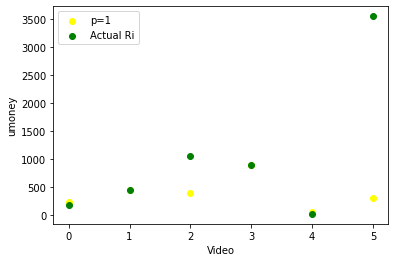

In [36]:
plt.scatter(range(6),df['Ri for p=1'],label='p=1',color='Yellow')
plt.scatter(range(6),df['Ri'],label='Actual Ri',color='Green')
plt.xlabel('Video')
plt.ylabel('umoney')
plt.legend();


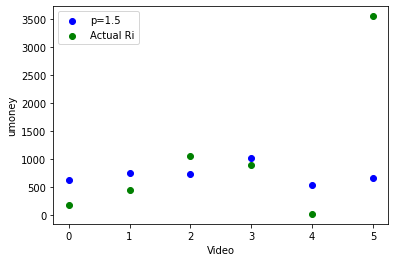

In [37]:
plt.scatter(range(6),df['Ri for p=1.5'],label='p=1.5',color='Blue')
plt.scatter(range(6),df['Ri'],label='Actual Ri',color='Green')
plt.xlabel('Video')
plt.ylabel('umoney')
plt.legend();


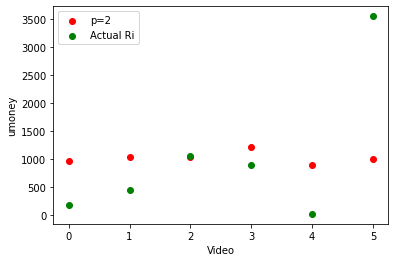

In [38]:
plt.scatter(range(6),df['Ri for p=2'],label='p=2',color='Red')
plt.scatter(range(6),df['Ri'],label='Actual Ri',color='Green')
plt.xlabel('Video')
plt.ylabel('umoney')
plt.legend();



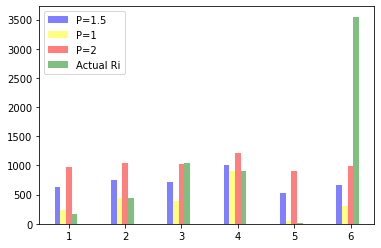

In [39]:
x=np.arange(1,7)
width=0.40
rects1= plt.bar(x-0.20,df['Ri for p=1.5'],width=0.10,alpha=0.5,label='P=1.5',color='Blue')
rects2= plt.bar(x-0.10,df['Ri for p=1'],width=0.10,alpha=0.5,label='P=1',color='Yellow')
rects3= plt.bar(x+0.00,df['Ri for p=2'],width=0.10,alpha=0.5,label='P=2',color='Red')
rects4= plt.bar(x+0.10,df['Ri'],width=0.10,alpha=0.5,label='Actual Ri',color='Green')
plt.legend();

#### Answer8: By observing above we can say that For p=1 , the forecast model estimated the revenue approximately equal to actual revenue for video=1,2,4,5.But for video=3,6 ,the forcast model can't estimate properly.

### for p=1.5, the forecast model does not estimate the revenue approximately to actual revenue but the difference between actual revenue and estimated revenue is smaller in comparison of observations for p=1.

### for p=2 , the forecast model does not estimate the revenue approximately to actual revenue but hte difference between actual revenue and estimated rvenue is smaller in comparison of observations for both p=1 and p=1.5.

---



In [40]:
MSS_p1= sum((df['Ri'][i]-df['Ri for p=1'][i])**2 for i in range(6))/6
MSS_p2= sum((df['Ri'][i]-df['Ri for p=1.5'][i])**2 for i in range(6))/6
MSS_p3= sum((df['Ri'][i]-df['Ri for p=2'][i])**2 for i in range(6))/6


In [41]:
print(MSS_p1)
print(MSS_p2)
print(MSS_p3)

1832267.272435175
1496011.445344473
1399991.1561852396


### 9. [R] Based on your results and plots, suggest using appropriate reasons which value of p is good for your problem among the three different choices you tried.
##### Answer: Among values {1,1.5,2}, for p=2  forecast model gives better esitmation for problem since mean square error is least for p=2.